In [362]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [363]:
with open("data/consumption.json", "r") as json_file:
    my_dict = json.load(json_file)

In [364]:
my_dict[0]

{'from': '2022-12-17T20:00:00.000+01:00',
 'to': '2022-12-17T21:00:00.000+01:00',
 'consumption': 8.741,
 'consumptionUnit': 'kWh'}

In [365]:
# [d['consumption'] for d in my_dict] 

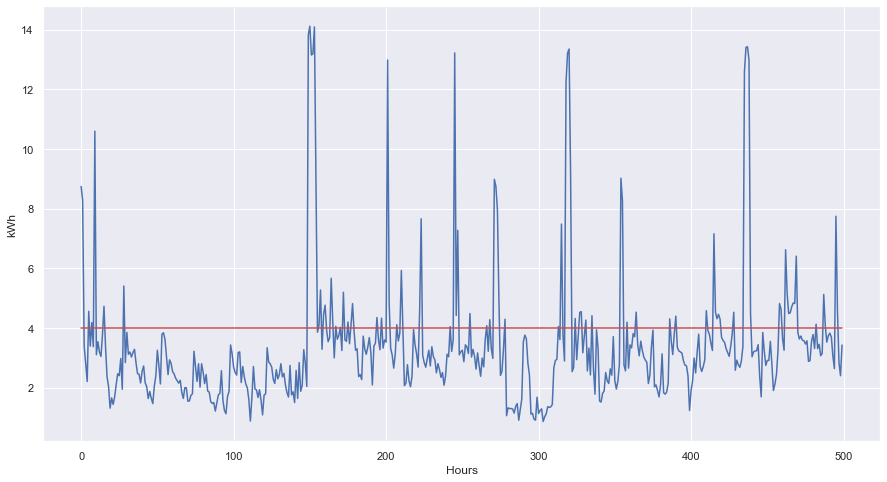

In [366]:
plt.figure(figsize=(15,8))
plt.plot(range(len(my_dict)), [d['consumption'] for d in my_dict])
plt.xlabel("Hours")
plt.ylabel("kWh")

plt.plot(range(len(my_dict)), [4] * len(my_dict), 'r')

plt.show()


In [367]:
np.array([d['consumption'] for d in my_dict]).mean()

3.3632119999999994

In [368]:
df = pd.read_excel ('data/spotpriser.xlsx')
print (df)

c:\Users\47472\AppData\Local\Programs\Python\Python39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


          Dato/klokkeslett       NO1       NO2       NO3      NO4       NO5
0     2022-02-01 Kl. 00-01  1.763187  1.763187  0.339363  0.21036  1.763187
1     2022-02-01 Kl. 01-02  1.741150  1.741150  0.282987  0.19993  1.741150
2     2022-02-01 Kl. 02-03  1.697550  1.697550  0.283112  0.19963  1.697550
3     2022-02-01 Kl. 03-04  1.687900  1.687900  0.280738  0.19943  1.687900
4     2022-02-01 Kl. 04-05  1.722975  1.722975  0.303287  0.19963  1.722975
...                    ...       ...       ...       ...      ...       ...
8779  2023-02-01 Kl. 19-20  1.373838  1.373838  1.350137  0.49582  1.373838
8780  2023-02-01 Kl. 20-21  1.329850  1.329850  1.269925  0.50901  1.329850
8781  2023-02-01 Kl. 21-22  1.290350  1.290350  1.290350  0.50029  1.290350
8782  2023-02-01 Kl. 22-23  1.245138  1.245138  1.176913  0.50421  1.245138
8783  2023-02-01 Kl. 23-24  1.147500  1.147500  1.070275  0.49441  1.147500

[8784 rows x 6 columns]


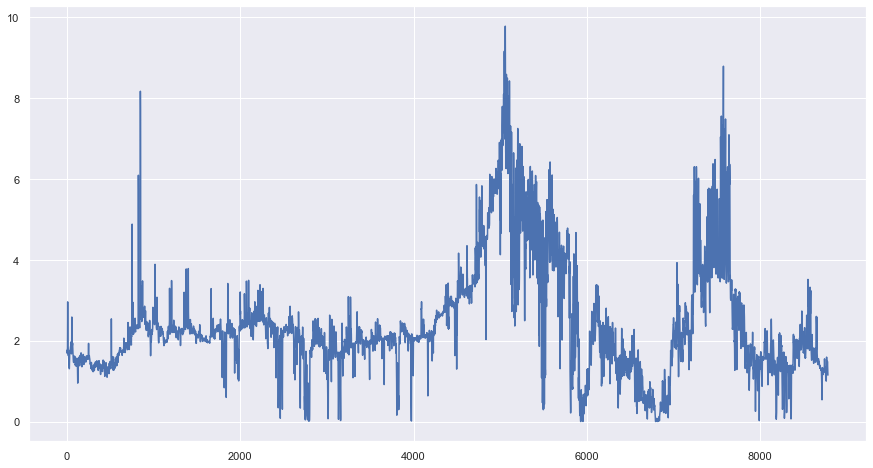

In [369]:
plt.plot(range(df['NO1'].size), df['NO1'])

In [370]:
def modifyDataframe(dataframe):
    #removes non date value
    dataframe['Dato/klokkeslett'] = dataframe['Dato/klokkeslett'].str[0:10]
    return dataframe

In [371]:
def getNewDataframe(dataframe, dictonary):
    dataframe = modifyDataframe(dataframe)
    indexes = dataframe[dataframe['Dato/klokkeslett']==my_dict[0]['from'][0:10]].index.values
    newDataframe = dataframe.iloc[indexes[0]:indexes[0]+len(dictonary)]
    return newDataframe


In [372]:
print(my_dict[0]['from'][0:10])
print(df['Dato/klokkeslett'][7660])

2022-12-17
2022-12-17 Kl. 04-05


In [373]:
print(df[df['Dato/klokkeslett']==my_dict[0]['from'][0:10]].index.values)

[]


In [374]:
newDF = getNewDataframe(df, my_dict)

In [375]:
newDF

,Dato/klokkeslett,NO1,NO2,NO3,NO4,NO5
7656,2022-12-17,3.609088,3.609088,1.469362,0.77964,3.609088
7657,2022-12-17,3.325238,3.325238,1.477637,0.74949,3.325238
7658,2022-12-17,3.190800,3.190800,1.452825,0.68322,3.190800
7659,2022-12-17,3.057412,3.057412,1.522925,0.65644,3.057412
7660,2022-12-17,3.001612,3.001612,1.574663,0.66284,3.001612
...,...,...,...,...,...,...
8151,2023-01-06,1.724512,1.724512,1.072712,0.56833,1.724512
8152,2023-01-06,1.815125,1.815125,1.041262,0.55752,1.815125
8153,2023-01-06,2.017212,2.017212,1.017313,0.55013,2.017212
8154,2023-01-06,1.950425,1.950425,1.011012,0.54103,1.950425


In [406]:
newDF.keys

<bound method NDFrame.keys of      Dato/klokkeslett       NO1       NO2       NO3      NO4       NO5
7656       2022-12-17  3.609088  3.609088  1.469362  0.77964  3.609088
7657       2022-12-17  3.325238  3.325238  1.477637  0.74949  3.325238
7658       2022-12-17  3.190800  3.190800  1.452825  0.68322  3.190800
7659       2022-12-17  3.057412  3.057412  1.522925  0.65644  3.057412
7660       2022-12-17  3.001612  3.001612  1.574663  0.66284  3.001612
...               ...       ...       ...       ...      ...       ...
8151       2023-01-06  1.724512  1.724512  1.072712  0.56833  1.724512
8152       2023-01-06  1.815125  1.815125  1.041262  0.55752  1.815125
8153       2023-01-06  2.017212  2.017212  1.017313  0.55013  2.017212
8154       2023-01-06  1.950425  1.950425  1.011012  0.54103  1.950425
8155       2023-01-06  1.899300  1.899300  0.996162  0.53257  1.899300

[500 rows x 6 columns]>

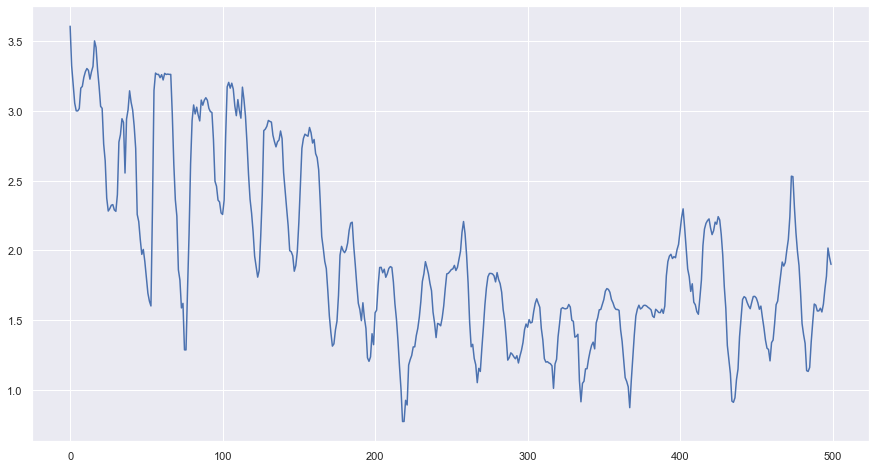

In [407]:
plt.plot(range(newDF['NO5'].size), newDF['NO5'])

In [386]:
np.asarray([d['consumption'] for d in my_dict])

array([ 8.741,  8.281,  3.397,  2.779,  2.204,  4.555,  3.388,  4.179,
        3.369, 10.594,  3.098,  3.535,  3.194,  3.043,  3.764,  4.726,
        3.377,  2.359,  2.034,  1.309,  1.653,  1.433,  1.69 ,  2.101,
        2.463,  2.396,  2.974,  1.94 ,  5.404,  2.836,  3.848,  3.116,
        3.19 ,  3.024,  3.172,  3.281,  2.827,  2.466,  2.445,  2.154,
        2.544,  2.723,  2.161,  2.03 ,  1.63 ,  1.868,  1.641,  1.461,
        2.044,  2.396,  3.249,  2.727,  2.12 ,  3.788,  3.838,  3.617,
        3.037,  2.434,  2.927,  2.811,  2.532,  2.454,  2.311,  2.227,
        2.148,  2.242,  1.84 ,  1.635,  1.994,  1.993,  1.541,  1.551,
        1.739,  1.787,  3.217,  2.717,  2.206,  2.797,  2.013,  2.798,
        2.518,  2.131,  2.435,  1.883,  1.847,  1.526,  1.466,  1.497,
        1.21 ,  1.486,  1.755,  1.804,  2.565,  1.567,  1.228,  1.122,
        1.699,  1.871,  3.426,  3.137,  2.683,  2.511,  2.418,  3.174,
        3.194,  2.169,  2.703,  2.361,  2.119,  1.992,  1.592,  0.877,
      

In [401]:
newnewDF = newDF.assign(consumption= [d['consumption'] for d in my_dict])

In [403]:
result = (newnewDF['NO1'] * newnewDF['consumption']).sum()

In [404]:
result

3181.322186775